# Visualisation and Model Development

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
df = pd.read_csv("/home/kkr/Downloads/Assignment/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
dff = df.drop(['MonthlyCharges', 'OnlineSecurity','StreamingTV','InternetService','Partner'], axis = 1)

In [4]:
dff.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,No,No phone service,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,34,Yes,No,No,Yes,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,0,No,2,Yes,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,0,No,45,No,No phone service,No,Yes,Yes,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,0,No,2,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [5]:
#dff.to_csv('Modified_dataset.csv')


In [6]:
#not null value checking(handling missing value)
dff.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

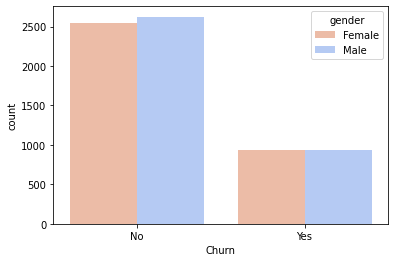

In [7]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

<AxesSubplot:xlabel='Churn', ylabel='count'>

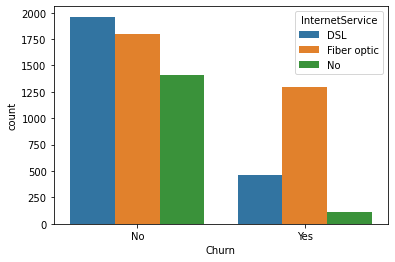

In [8]:
sns.countplot(x='Churn',data=df, hue='InternetService')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

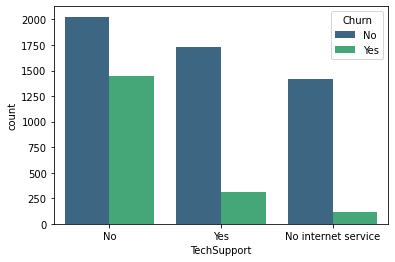

In [9]:
sns.countplot(x='TechSupport',data=df, hue='Churn',palette='viridis')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

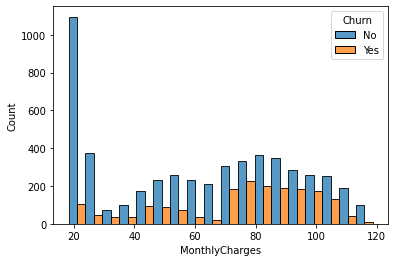

In [10]:
sns.histplot(x='MonthlyCharges',hue='Churn',data=df,multiple='dodge')

In [11]:
#converting the categorical variables in our data set to numerical values by using one-hot encoding.

In [12]:
dff_copy =pd.get_dummies(df,drop_first=True)
dff_copy.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
#dff_copy['Churn_Yes'].head()
X=dff_copy.drop(['Churn_Yes'],axis=1)


In [14]:
Y=dff_copy.iloc[:,-1:]
Y.head()

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


In [15]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0.0,0.013889,0.115423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.472222,0.385075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.027778,0.354229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.625000,0.239303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=41)

In [17]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7931850449597728


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
print(confusion_matrix(y_test,prediction_logreg))

[[1380  174]
 [ 263  296]]
